# Basics of leaky-integrate-and-fire (LIF) neuron  






In [55]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
from importlib import reload
plt=reload(plt)


In [57]:
# @title Figure settings
import logging
logging.getLogger('matplotlib.font_manager').disabled = True
import ipywidgets as widgets  # interactive display
%config InlineBackend.figure_format = 'retina'
plt.style.use("https://raw.githubusercontent.com/NeuromatchAcademy/course-content/master/nma.mplstyle")

## LIF model

$ \tau_m \frac{d}{dt}V(t) = E_L - V(t) + R.I(t) $, $\;\;\;\;$ if  $\;\;\;\;\;\;$  $V(t)<V_{th}$ <br> <br>
$ V(t)=V_{reset} $, $\;\;\;\;\;\;$  Otherwise <br><br>

In order to simulate the equation, we first discretize it: <br><br>

$V(t+1) = V(t) + \frac{\Delta t}{\tau_m}[E_L - V(t) + R.I(t)]$


0.15


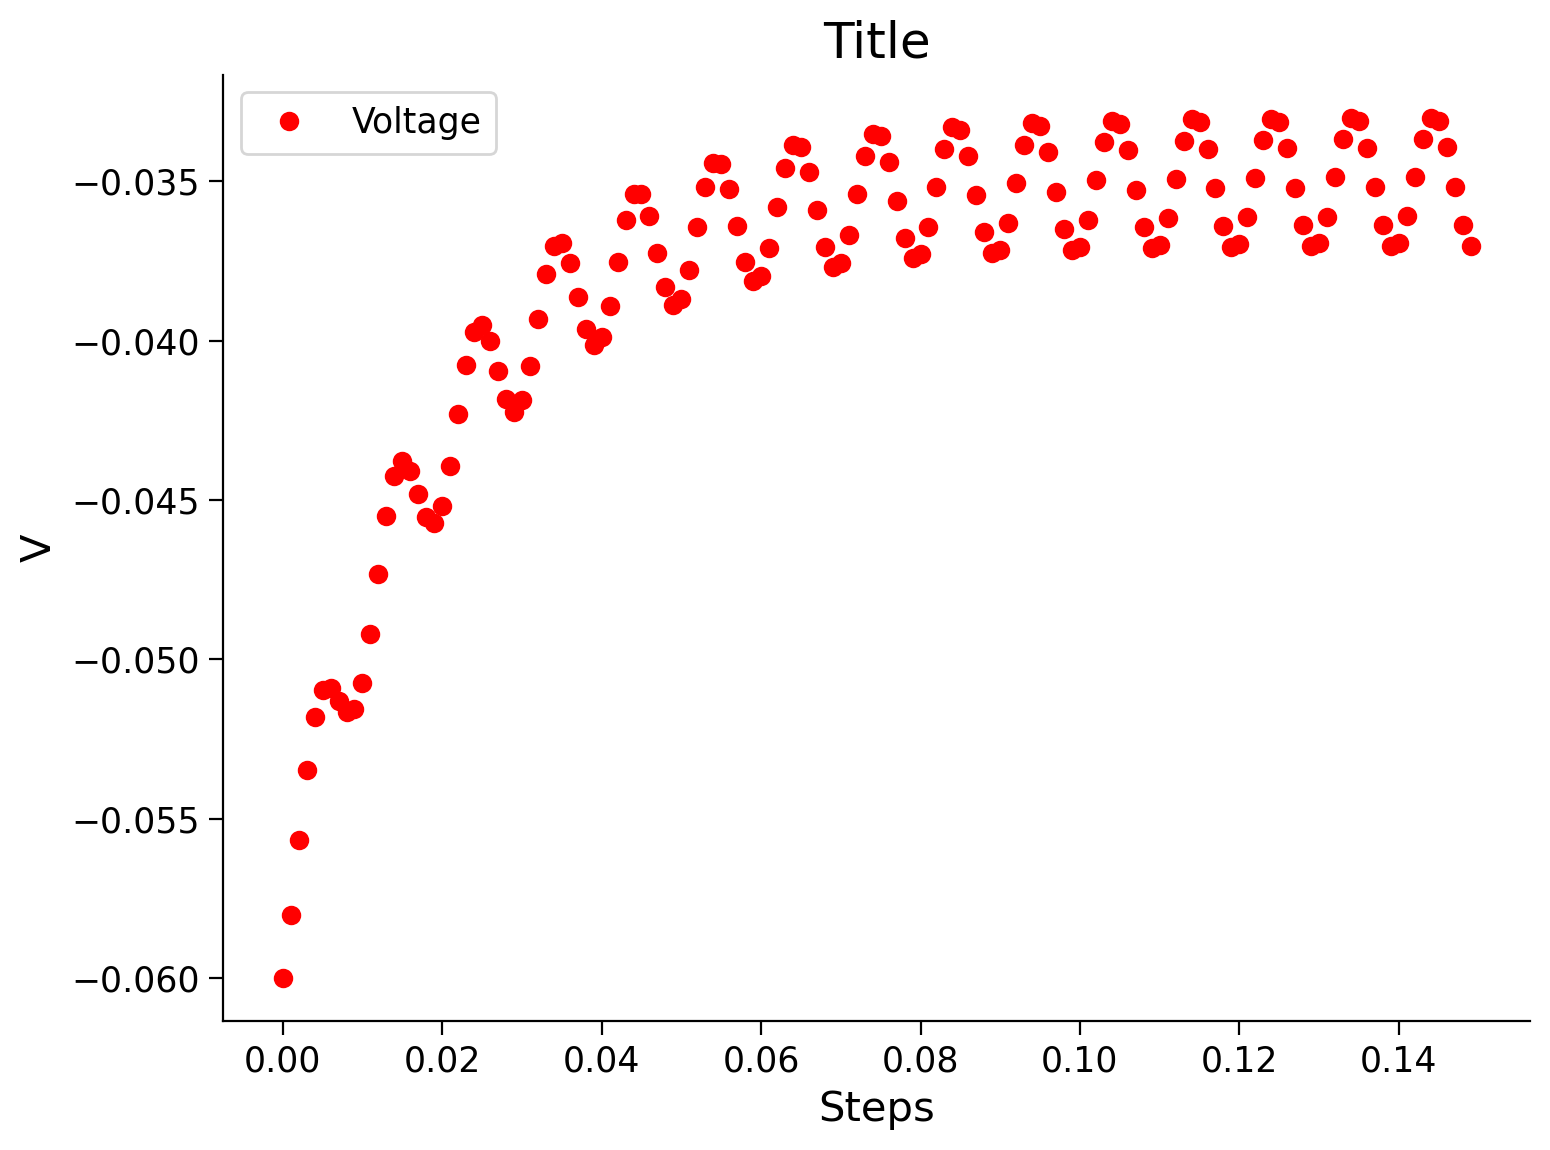

In [62]:
t_max = 150e-3   # second
dt = 1e-3        # second
tau = 20e-3      # second
el = -60e-3      # milivolt
vr = -70e-3      # milivolt
vth = -50e-3     # milivolt
r = 100e6        # ohm
i_mean = 25e-11  # ampere
print(t_max)


STEPS = int(t_max/dt)
V = np.zeros(STEPS)
t = np.zeros(STEPS)
# print(V)
V[0] = el
for step in range(STEPS-1):
    t[step+1] = (step+1) * dt
    I = i_mean * (1 + np.sin((t[step+1] * 2 * np.pi) / 0.01))
    V[step+1] = V[step] + (dt/tau)*(el - V[step] + r*I) 
    #print(f"{t:.3f}{V[step+1]:.3e}")  
    
plt.figure(1)
plt.title('Title')
plt.xlabel('Steps')
plt.ylabel('V')
plt.plot(t,V, 'ro' , label='Voltage')
plt.legend()
plt.show()